<a href="https://colab.research.google.com/github/aishmeister/ExploratoryDataAnalysis/blob/main/aisha%26diego_DSC101finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diego Mendez and Aisha Mahmoud         
DSC 101  - Final Project          
Marcus Birkenkrahe       
5 December 2021    
Pledged**

# ***MLS vs EPL soccer comparisons***














MLS: Major League Soccer
EPL: English Premier League

First, loading the data. Originally, for some reason, I was in another workspace that wasn't using R, so I had trouble with that.

In [ ]:
library(ggplot2)
 install.packages("ggrepel")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
data <- read.csv("englandPlayers4.txt", sep="\t")
str(data)

'data.frame':	482 obs. of  38 variables:
 $ Number                            : int  27 17 16 26 8 15 32 5 5 2 ...
 $ Name                              : chr  "Joao Cancelo" "Kevin De Bruyne" "Rodri" "Riyad Mahrez" ...
 $ Position                          : chr  "D" "M" "M" "A" ...
 $ InStat.Index                      : chr  "368" "366" "363" "362" ...
 $ Matches.played                    : int  28 24 33 26 28 24 10 21 34 18 ...
 $ minutesPlayed                     : int  2433 2008 2883 1987 2160 2171 741 1953 3270 1725 ...
 $ Starting.lineup.appearances       : chr  "27" "22" "31" "22" ...
 $ Substitute.out                    : chr  "3" "6" "3" "9" ...
 $ Substitutes.in                    : chr  "1" "2" "2" "4" ...
 $ Goals                             : chr  "2" "5" "2" "9" ...
 $ Assists                           : chr  "3" "10" "2" "5" ...
 $ Offsides                          : chr  "2" "1" "2" "6" ...
 $ Yellow.cards                      : chr  "5" "1" "6" "-" ...
 $ Red.cards     

In [ ]:
#there's gotta be a more efficient way to do this...
data$Goals <- as.integer(data$Goals)
data$Assists <- as.integer(data$Assists)
data$Shots.On.Target <- as.integer(data$Shots.on.target)
data$expectedGoals <- as.integer(data$expectedGoals)

#midfielders stats
#data$Accurate.passes... <- as.integer(data$Accurate.passes...)    percentage problem
data$Assists <- as.integer(data$Assists)
data$Key.passes <- as.integer(data$Key.passes)
data$Dribbles <- as.integer(data$Dribbles)

#defenders stats
#data$Challenges.won... <- as.integer(data$Challenges.won...)    #these are in percentages... leave as character for now
data$Tackles <- as.integer(data$Tackles)
data$ballRecoveries <- as.integer(data$ballRecoveries)


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


finding the mean time minutes played. we don't want the lower half data, because if you've only played a few games, you're not going to have that much of an impact anyway.


In [ ]:
meanMinutes = mean(data$minutesPlayed)

y = data$minutesPlayed>meanMinutes
y1 = data[y,]
players = y1

#This cut the data in half, giving us the top half of players Minutes played.
#We will now work with players data set.

str(players)

'data.frame':	229 obs. of  39 variables:
 $ Number                            : int  27 17 16 26 8 15 5 5 2 10 ...
 $ Name                              : chr  "Joao Cancelo" "Kevin De Bruyne" "Rodri" "Riyad Mahrez" ...
 $ Position                          : chr  "D" "M" "M" "A" ...
 $ InStat.Index                      : chr  "368" "366" "363" "362" ...
 $ Matches.played                    : int  28 24 33 26 28 24 21 34 18 25 ...
 $ minutesPlayed                     : int  2433 2008 2883 1987 2160 2171 1953 3270 1725 2257 ...
 $ Starting.lineup.appearances       : chr  "27" "22" "31" "22" ...
 $ Substitute.out                    : chr  "3" "6" "3" "9" ...
 $ Substitutes.in                    : chr  "1" "2" "2" "4" ...
 $ Goals                             : int  2 5 2 9 13 5 4 2 1 6 ...
 $ Assists                           : int  3 10 2 5 2 NA NA 1 NA 10 ...
 $ Offsides                          : chr  "2" "1" "2" "6" ...
 $ Yellow.cards                      : chr  "5" "1" "6" "-" ...
 $ 

In [ ]:


attackers = players[(players$Position=="A"), ]
#str(attackers)

defenders = players[(players$Position=="D"), ]
midfielders = players[(players$Position=="M"), ]
str(defenders)

#one error I had here was  I was accidentally pulling the positions from data,
#instead of players, meaning I still had the players who played less than the mean number of minutes.

'data.frame':	92 obs. of  39 variables:
 $ Number                            : int  27 15 5 5 2 21 2 66 6 3 ...
 $ Name                              : chr  "Joao Cancelo" "Kurt Happy Zouma" "John Stones" "Harry Maguire" ...
 $ Position                          : chr  "D" "D" "D" "D" ...
 $ InStat.Index                      : chr  "368" "354" "351" "350" ...
 $ Matches.played                    : int  28 24 21 34 18 26 23 36 22 31 ...
 $ minutesPlayed                     : int  2433 2171 1953 3270 1725 2328 1973 3262 1962 2912 ...
 $ Starting.lineup.appearances       : chr  "27" "22" "21" "34" ...
 $ Substitute.out                    : chr  "3" "-" "-" "1" ...
 $ Substitutes.in                    : chr  "1" "2" "-" "-" ...
 $ Goals                             : int  2 5 4 2 1 2 1 2 2 1 ...
 $ Assists                           : int  3 NA NA 1 NA 5 1 7 NA NA ...
 $ Offsides                          : chr  "2" "-" "1" "1" ...
 $ Yellow.cards                      : chr  "5" "3" "-" "11" ..

Now, to extract the variables we care about for each position.

In [ ]:
keptAttackers <-c("Name", "Number","Dribbles","Goals", "expectedGoals", "Shots.on.target","minutesPlayed")
attackersFrame <- attackers[keptAttackers]

In [ ]:
keptDefenders <- c("Name", "Number", "Challenges.won...", "Tackles", "ballRecoveries", "minutesPlayed")
defendersFrame <- defenders[keptDefenders]

In [ ]:
keptMidfielders <- c("Name", "Number", "Assists", "Accurate.passes...", "Key.passes", "Dribbles", "minutesPlayed")
midfieldersFrame <- midfielders[keptMidfielders]

Now, we have a data frame for attackers with its relevant statistics, a data frame for midfielders with their relevant statistics, and a data frame for defenders with their relevant statistics.

Time to see who has the highest stats in each category!

#**EPL DEFENDERS**

In [ ]:
str(defendersFrame)


'data.frame':	92 obs. of  6 variables:
 $ Name             : chr  "Joao Cancelo" "Kurt Happy Zouma" "John Stones" "Harry Maguire" ...
 $ Number           : int  27 15 5 5 2 21 2 66 6 3 ...
 $ Challenges.won...: chr  "55%" "80%" "76%" "72%" ...
 $ Tackles          : int  120 25 36 57 41 72 56 99 34 46 ...
 $ ballRecoveries   : int  156 175 128 305 143 104 132 195 197 217 ...
 $ minutesPlayed    : int  2433 2171 1953 3270 1725 2328 1973 3262 1962 2912 ...


Who made the most tackles?

In [ ]:
defendersFrame[which.max(defendersFrame$Tackles),]

,Name,Number,Challenges.won...,Tackles,ballRecoveries,minutesPlayed
,<chr>,<int>,<chr>,<int>,<int>,<int>
175,Luke Ayling,2,60%,186,308,3628


Which defender had the most ball recoveries?


In [ ]:
defendersFrame[which.max(defendersFrame$ballRecoveries),]

,Name,Number,Challenges.won...,Tackles,ballRecoveries,minutesPlayed
,<chr>,<int>,<chr>,<int>,<int>,<int>
139,Jan Bednarek,35,67%,75,329,3318


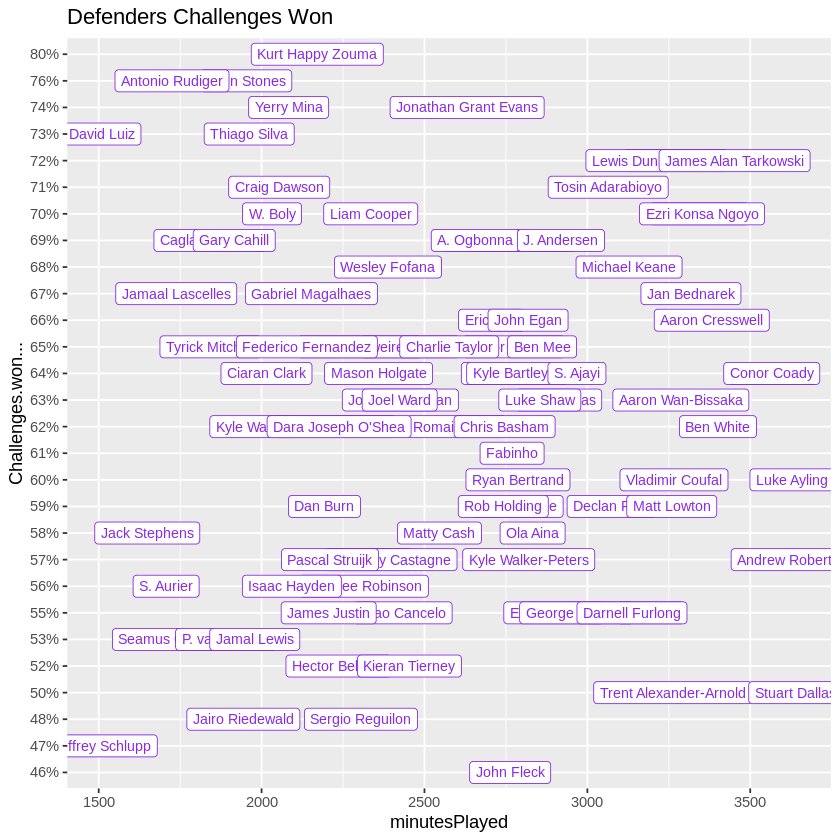

In [ ]:
ggplot(defendersFrame, aes(x = minutesPlayed, y = Challenges.won...)) + geom_label(aes(label= Name), size=3, col="blueviolet") + ggtitle("Defenders Challenges Won")

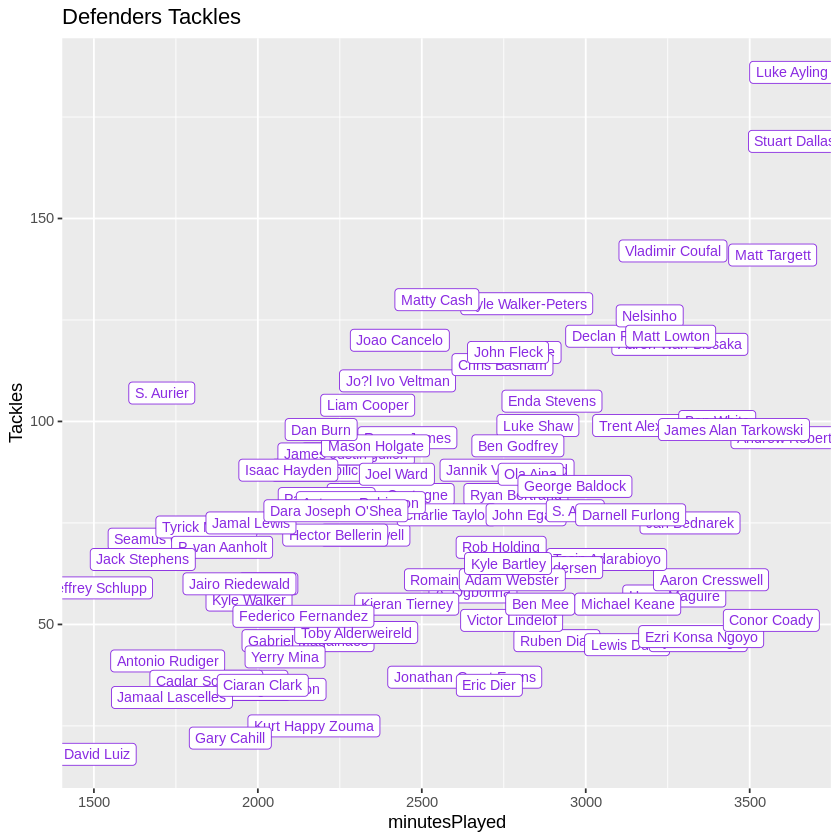

In [ ]:
ggplot(defendersFrame, aes(x = minutesPlayed, y = Tackles)) + geom_label(aes(label= Name), size=3, col="blueviolet") + ggtitle("Defenders Tackles")

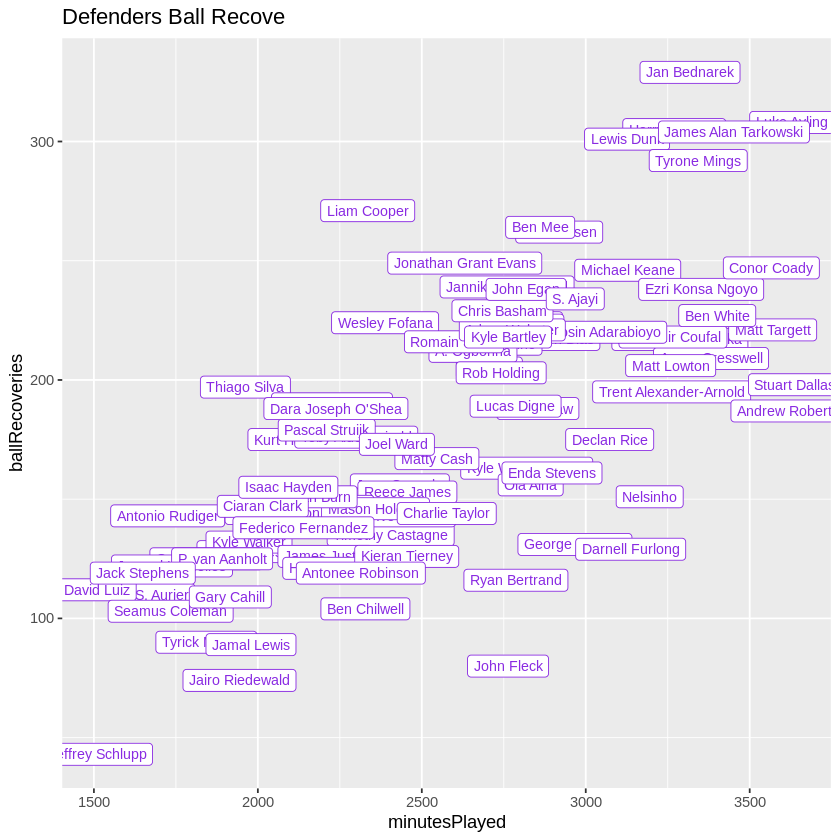

In [ ]:
ggplot(defendersFrame, aes(x = minutesPlayed, y = ballRecoveries)) + geom_label(aes(label= Name), size=3, col="blueviolet") + ggtitle("Defenders Ball Recove")

#**EPL MIDFIELDERS**




In [ ]:
#finding who had the most:("Name", "Number", "Assists", "Accurate.passes...", "Key.passes", "Dribbles")

In [ ]:
print("The midfielder with the most amount of assists:")
midfieldersFrame[which.max(midfieldersFrame$Assists),]

print("The midfielder with the most amount of accurate passes:")
midfieldersFrame[which.max(midfieldersFrame$Accurate.passes...),]

print("The midfielder with the most amount of key passes:")
midfieldersFrame[which.max(midfieldersFrame$Key.passes),]

print("The midfielder with the most amount of dribbles:")
midfieldersFrame[which.max(midfieldersFrame$Dribbles),]

#there's an error here... why is it not showing the name?

[1] "The midfielder with the most amount of assists:"


,Name,Number,Assists,Accurate.passes...,Key.passes,Dribbles,minutesPlayed
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>
17,Bruno Fernandes,18,12,76%,90,68,3298


[1] "The midfielder with the most amount of accurate passes:"


Warning message in which.max(midfieldersFrame$Accurate.passes...):
“NAs introduced by coercion”


Name,Number,Assists,Accurate.passes...,Key.passes,Dribbles,minutesPlayed
<chr>,<int>,<int>,<chr>,<int>,<int>,<int>


[1] "The midfielder with the most amount of key passes:"


,Name,Number,Assists,Accurate.passes...,Key.passes,Dribbles,minutesPlayed
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>
17,Bruno Fernandes,18,12,76%,90,68,3298


[1] "The midfielder with the most amount of dribbles:"


,Name,Number,Assists,Accurate.passes...,Key.passes,Dribbles,minutesPlayed
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>
164,Stuart Armstrong,17,5,82%,28,170,2936


In [ ]:
midfieldersFrame[is.na(midfieldersFrame)] = 0

In [ ]:
midfieldersFrame$Name[2349==midfieldersFrame$minutesPlayed] <- "Gylfi Sigurdsson"

In [ ]:
midfieldersFrame$Name[2205==midfieldersFrame$minutesPlayed] <- "Tanguy Ndombele"

In [ ]:
midfieldersFrame$Name[3574==midfieldersFrame$minutesPlayed] <- "P. Hojbjerg"

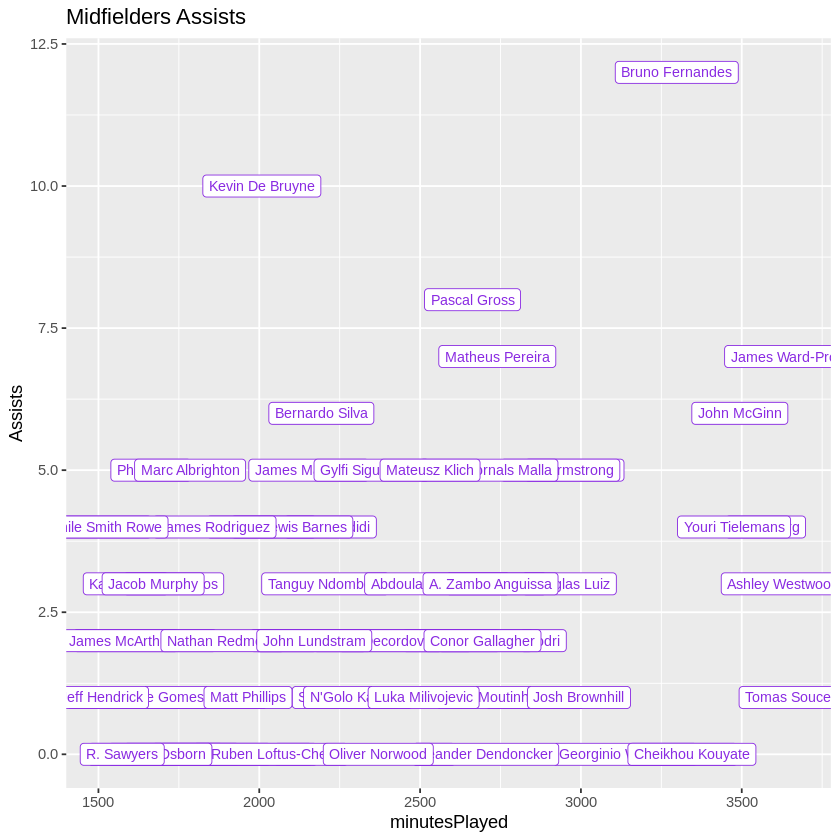

In [ ]:
ggplot(midfieldersFrame, aes(x = minutesPlayed, y = Assists)) + geom_label(aes(label= Name), size=3, col="blueviolet") +ggtitle("Midfielders Assists")

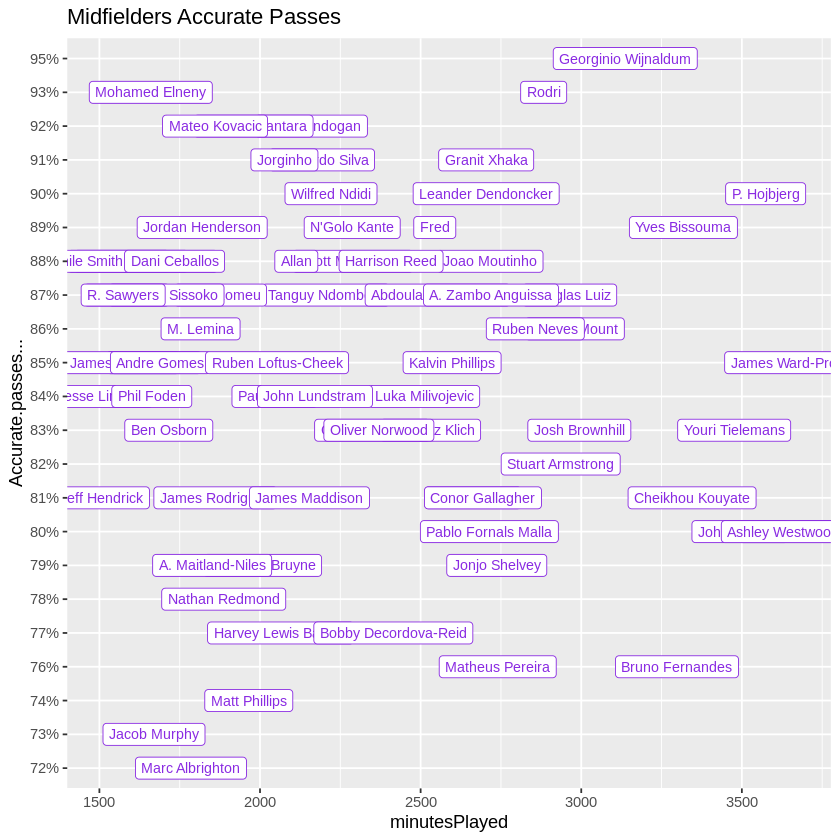

In [ ]:
ggplot(midfieldersFrame, aes(x = minutesPlayed, y = Accurate.passes...)) + geom_label(aes(label= Name), size=3, col="blueviolet") +ggtitle("Midfielders Accurate Passes")

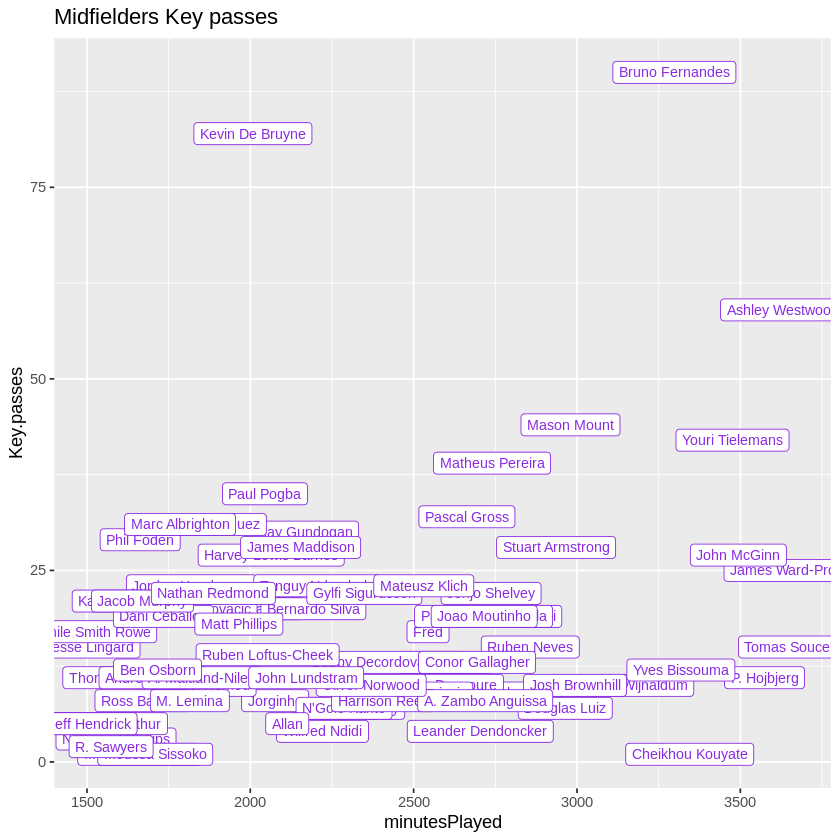

In [ ]:
ggplot(midfieldersFrame, aes(x = minutesPlayed, y = Key.passes)) + geom_label(aes(label= Name), size=3, col="blueviolet") + ggtitle("Midfielders Key passes")

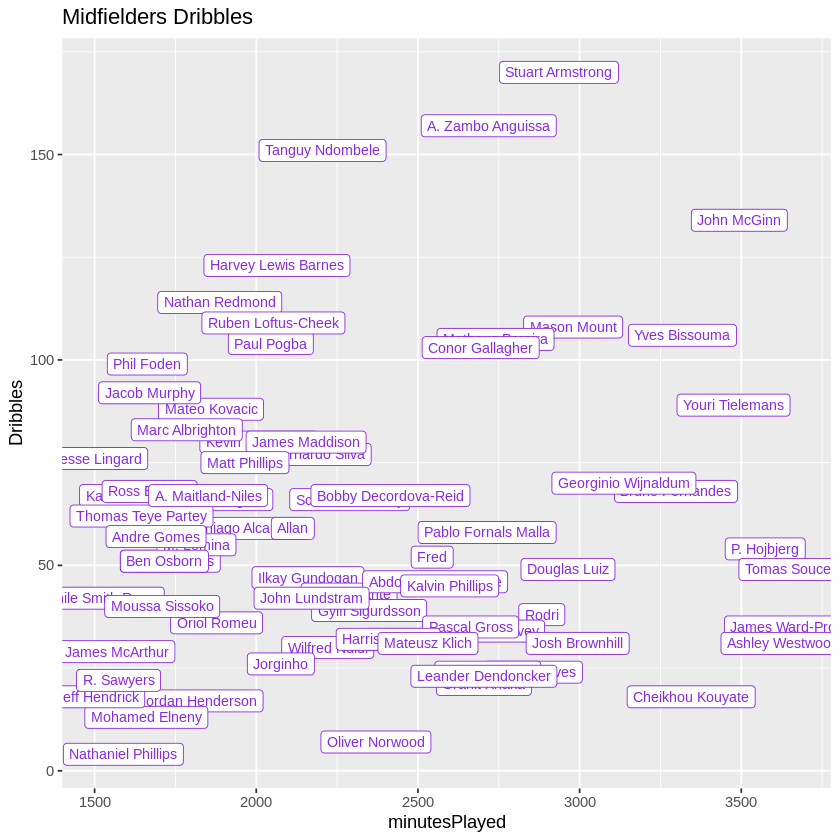

In [ ]:
ggplot(midfieldersFrame, aes(x = minutesPlayed, y = Dribbles)) + geom_label(aes(label= Name), size=3, col="blueviolet") + ggtitle("Midfielders Dribbles")

#**EPL ATTACKERS**

In [ ]:
#finding who had the most:("Dribbles","Goals", "expectedGoals", "Shots.on.target")

In [ ]:
print("The attacker with the most amount of goals:")
attackersFrame[which.max(attackersFrame$Goals),]

print("\nThe attacker with the most amount of expected goals:")
attackersFrame[which.max(attackersFrame$expectedGoals),]

print("\n\nThe attacker with the most amount of dribbles:")
attackersFrame[which.max(attackersFrame$Dribbles),]

print("\nThe attacker with the most amount of shots on target:")
attackersFrame[which.max(attackersFrame$Shots.on.target),]

#why does \n not work for making a new line?

[1] "The attacker with the most amount of goals:"


,Name,Number,Dribbles,Goals,expectedGoals,Shots.on.target,minutesPlayed
,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>
14,Mohamed Salah,11,134,22,20,52,3306


[1] "\nThe attacker with the most amount of expected goals:"


,Name,Number,Dribbles,Goals,expectedGoals,Shots.on.target,minutesPlayed
,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>
14,Mohamed Salah,11,134,22,20,52,3306


[1] "\n\nThe attacker with the most amount of dribbles:"


,Name,Number,Dribbles,Goals,expectedGoals,Shots.on.target,minutesPlayed
,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>
190,Adama Traore,37,329,2,3,13,2878


[1] "\nThe attacker with the most amount of shots on target:"


,Name,Number,Dribbles,Goals,expectedGoals,Shots.on.target,minutesPlayed
,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>
26,Harry Kane,10,119,22,20,53,3200


Here we see that Mo Salah had both the highest number of expected goals, and the highest number of goals. So he really lived up to his expectations.



In [ ]:
library(ggplot2)

In [ ]:
dt <- attackersFrame

In [ ]:
dt$Name[2509==attackersFrame$minutesPlayed] <- "Amir"

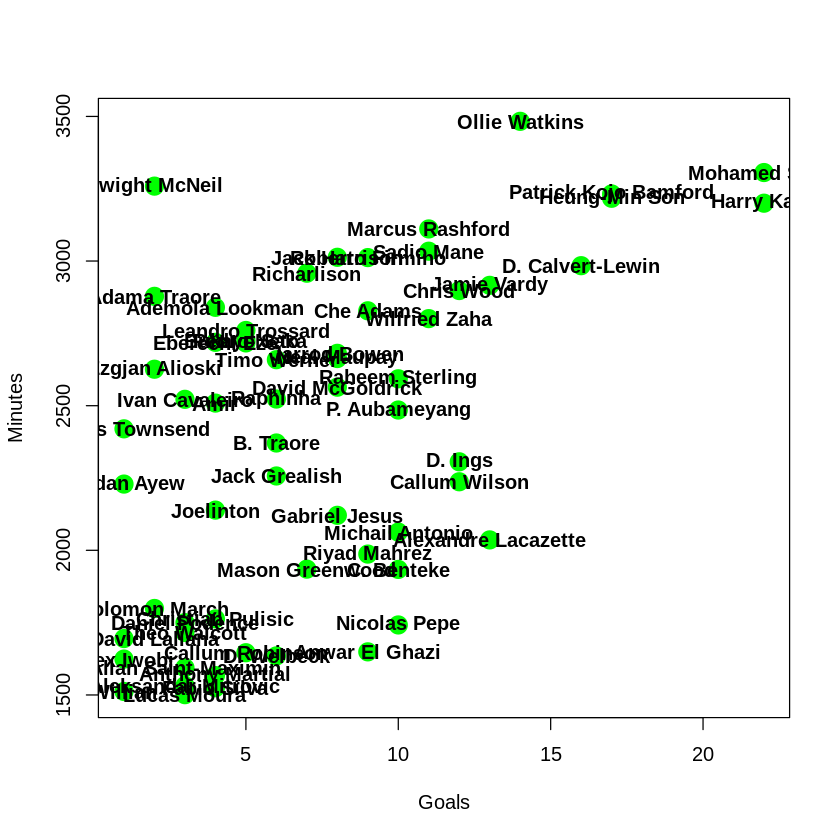

In [ ]:
plot(x=attackersFrame$Goals, y=attackersFrame$minutesPlayed, ylab= "Minutes", xlab= "Goals", col="green", pch = 20, cex = 3)
text(x=attackersFrame$Goals,y=attackersFrame$minutesPlayed, labels=dt$Name , col="black", cex=1, font=2)

In [ ]:
install.packages("ggrepel")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Warning message:
“Removed 2 rows containing missing values (`geom_label()`).”


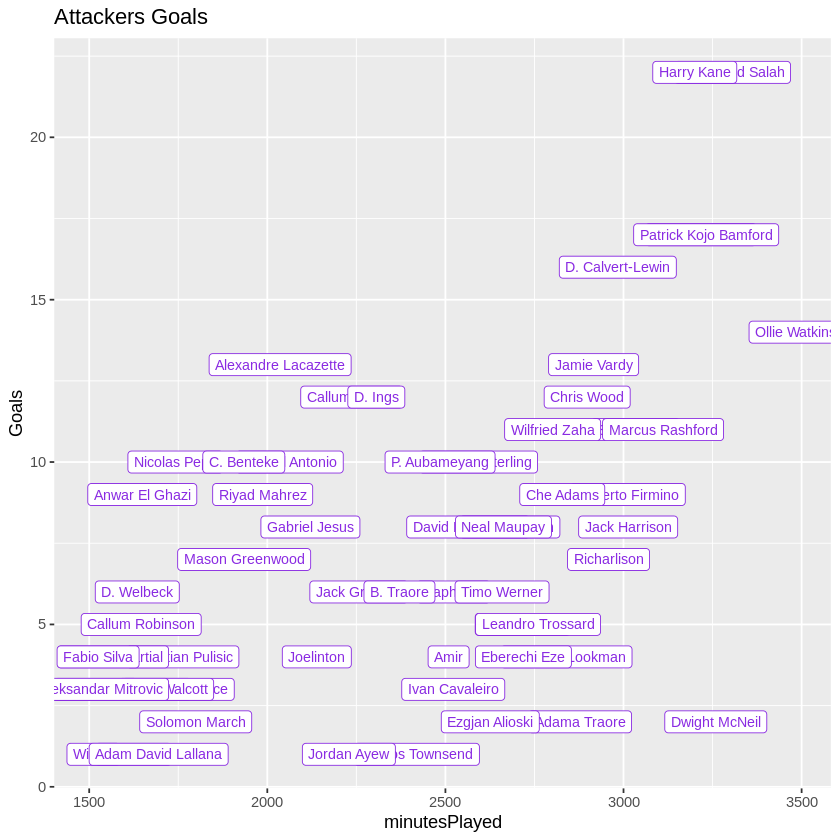

In [ ]:
ggplot(dt, aes(x = minutesPlayed, y = Goals)) + geom_label(aes(label= dt$Name), size=3, col="blueviolet") + ggtitle("Attackers Goals")

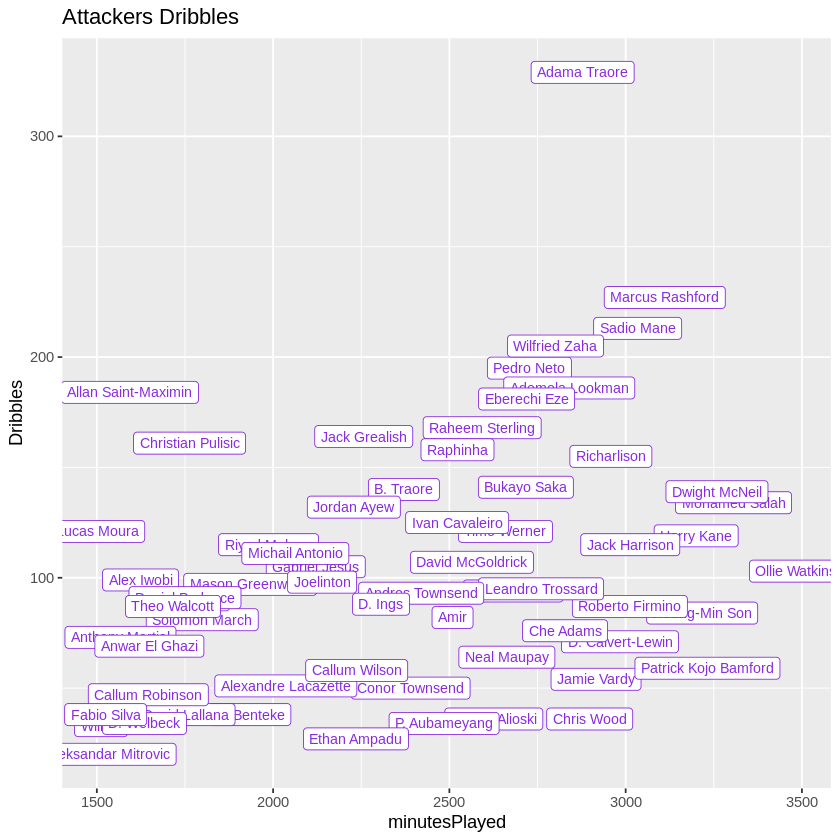

In [ ]:
ggplot(dt, aes(x = minutesPlayed, y = Dribbles)) + geom_label(aes(label= Name), size=3, col="blueviolet") +ggtitle("Attackers Dribbles")

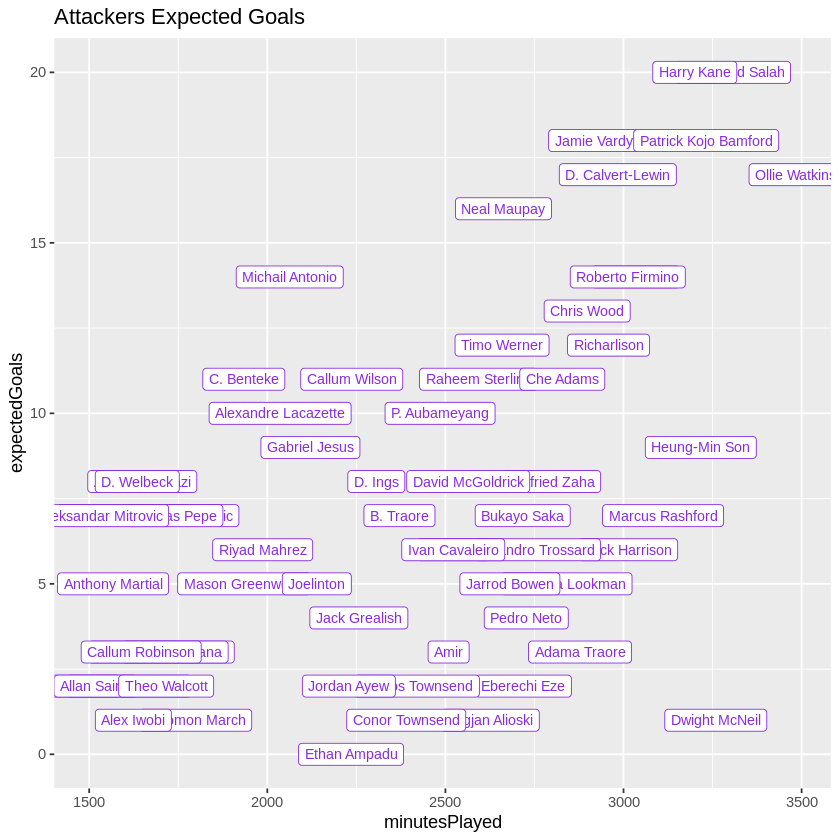

In [ ]:
ggplot(dt, aes(x = minutesPlayed, y = expectedGoals)) + geom_label(aes(label= Name), size=3, col="blueviolet") + ggtitle("Attackers Expected Goals")

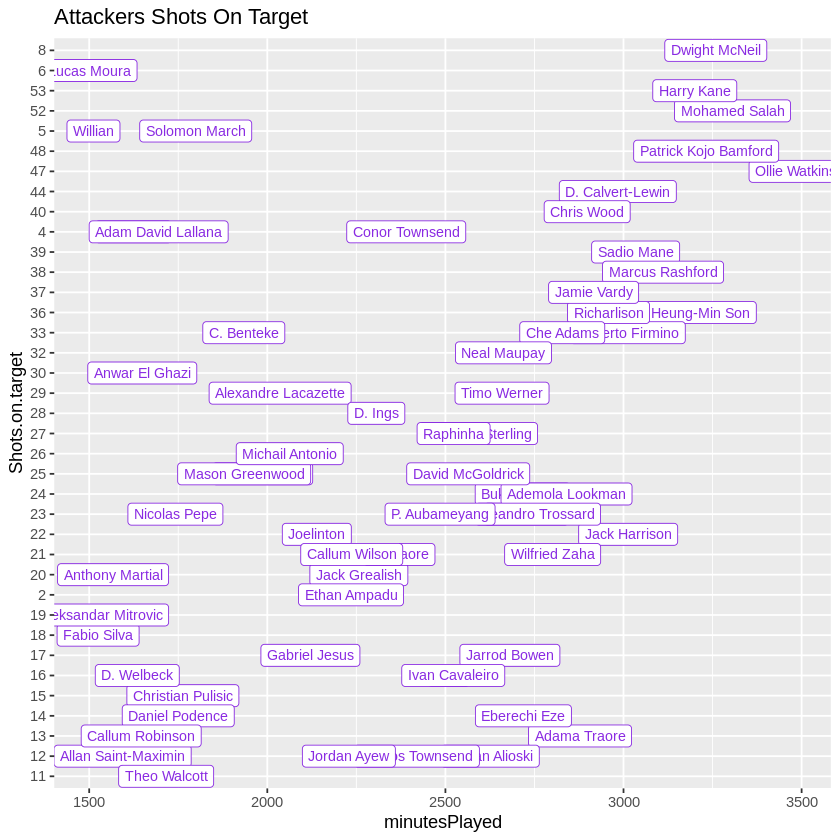

In [ ]:
ggplot(dt, aes(x = minutesPlayed, y = Shots.on.target)) + geom_label(aes(label= Name), size=3, col="blueviolet") + ggtitle("Attackers Shots On Target")

### ***NOW DOING THE AMERICAN LEAGUE***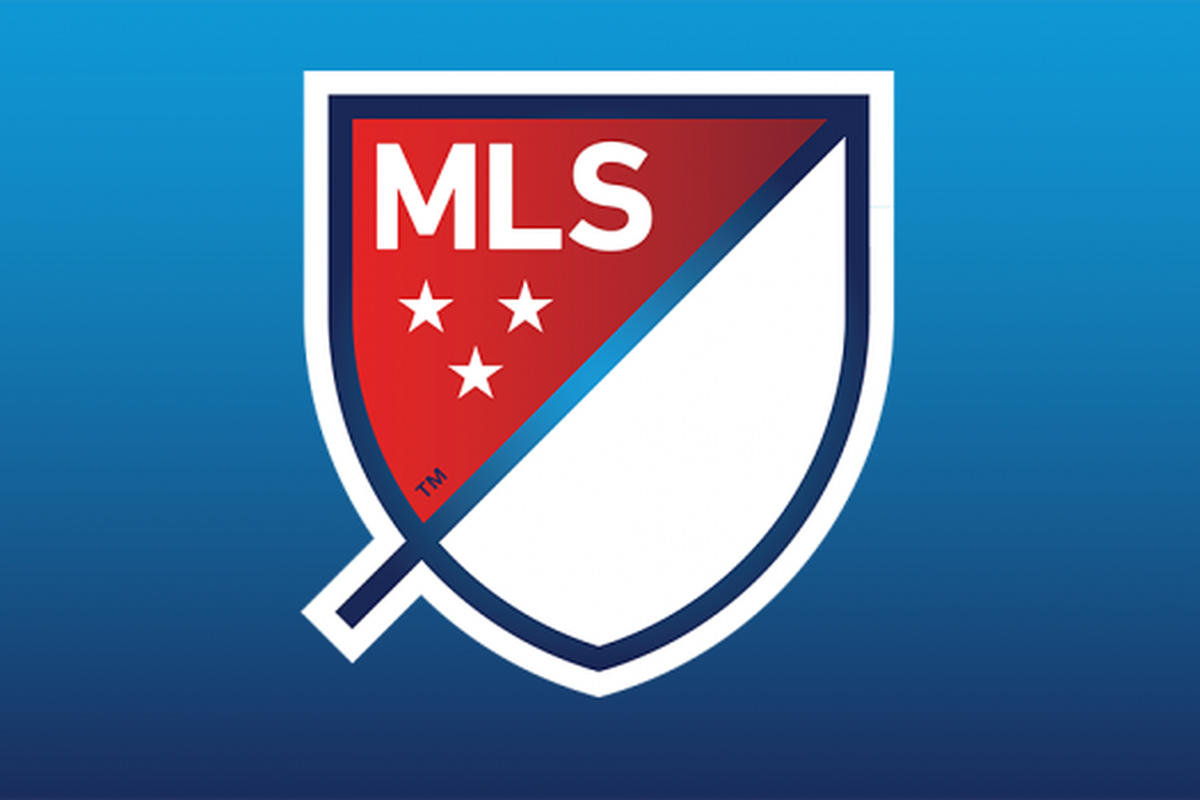

In [ ]:
AMdata <- read.csv("mlstext1.txt", sep="\t")
str(AMdata)

'data.frame':	618 obs. of  38 variables:
 $ Number                            : int  10 17 7 9 10 10 10 9 16 10 ...
 $ Name                              : chr  "S. Blanco" "Nani" "Kevin Molino" "D. Rossi" ...
 $ Position                          : chr  "M" "A" "M" "A" ...
 $ InStat.Index                      : chr  "257" "272" "257" "264" ...
 $ Matches.played                    : int  28 28 26 27 26 27 26 25 25 26 ...
 $ Minutes.played                    : int  2776 2759 2539 2533 2525 2485 2479 2475 2460 2453 ...
 $ Starting.lineup.appearances       : chr  "28" "28" "26" "26" ...
 $ Substitute.out                    : chr  "2" "-" "-" "2" ...
 $ Substitutes.in                    : chr  "-" "-" "-" "1" ...
 $ Goals                             : chr  "-" "-" "1" "2" ...
 $ Assists                           : chr  "1" "1" "1" "5" ...
 $ Offsides                          : chr  "-" "1" "-" "4" ...
 $ Yellow.cards                      : chr  "4" "5" "1" "1" ...
 $ Red.cards               

In [ ]:
#there's gotta be a more efficient way to do this...
AMdata$Goals <- as.integer(AMdata$Goals)
AMdata$Assists <- as.integer(AMdata$Assists)
AMdata$Shots.on.Target <- as.integer(AMdata$Shots.on.target)
AMdata$xG..Expected.goals. <- as.integer(AMdata$xG..Expected.goals.)


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [ ]:
str(AMdata$Goals)

 int [1:618] NA NA 1 2 4 3 4 1 2 1 ...


In [ ]:
#midfielders stats
#data$Accurate.passes... <- as.integer(data$Accurate.passes...)    percentage problem
AMdata$Assists <- as.integer(AMdata$Assists)
AMdata$Key.passes <- as.integer(AMdata$Key.passes)
AMdata$Dribbles <- as.integer(AMdata$Dribbles)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [ ]:
str(AMdata$Assists)

 int [1:618] 1 1 1 5 4 2 5 5 1 3 ...


In [ ]:
#defenders stats
#data$Challenges.won... <- as.integer(data$Challenges.won...)    #these are in percentages... leave as character for now
AMdata$Tackles <- as.integer(AMdata$Tackles)
AMdata$Ball.recoveries <- as.integer(AMdata$Ball.recoveries)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


Much of our data is stored as characters, so to be able to compare them as numbers, we neeed to make them into integers.


Only keeping the players with above the avarage time of minutes played.

In [ ]:
AMdata$Minutes.played <- as.integer(AMdata$Minutes.played)

In [ ]:
str(AMdata$Minutes.played)

 int [1:618] 2776 2759 2539 2533 2525 2485 2479 2475 2460 2453 ...


In [ ]:
a <- AMdata$Minutes.played>1020
a1 <- AMdata[a,]
AMplayers <- a1

In [ ]:
str(AMplayers)

'data.frame':	300 obs. of  39 variables:
 $ Number                            : int  10 17 7 9 10 10 10 9 16 10 ...
 $ Name                              : chr  "S. Blanco" "Nani" "Kevin Molino" "D. Rossi" ...
 $ Position                          : chr  "M" "A" "M" "A" ...
 $ InStat.Index                      : chr  "257" "272" "257" "264" ...
 $ Matches.played                    : int  28 28 26 27 26 27 26 25 25 26 ...
 $ Minutes.played                    : int  2776 2759 2539 2533 2525 2485 2479 2475 2460 2453 ...
 $ Starting.lineup.appearances       : chr  "28" "28" "26" "26" ...
 $ Substitute.out                    : chr  "2" "-" "-" "2" ...
 $ Substitutes.in                    : chr  "-" "-" "-" "1" ...
 $ Goals                             : int  NA NA 1 2 4 3 4 1 2 1 ...
 $ Assists                           : int  1 1 1 5 4 2 5 5 1 3 ...
 $ Offsides                          : chr  "-" "1" "-" "4" ...
 $ Yellow.cards                      : chr  "4" "5" "1" "1" ...
 $ Red.cards     

separating all the American players into their positions.

In [ ]:
AMattackers = AMplayers[(AMplayers$Position=="A"), ]
AMdefenders = AMplayers[(AMplayers$Position=="D"), ]
AMmidfielders = AMplayers[(AMplayers$Position=="M"), ]


now extracting the variables relevant for each position (that we decided upon), and renaming it.

In [ ]:
AMkeptAttackers <-c("Number", "Name","Dribbles","Goals", "xG..Expected.goals.", "Shots.on.Target","Minutes.played")
AMattackersFrame <- AMattackers[AMkeptAttackers]

In [ ]:

colnames(AMattackersFrame) <- c("Number", "Name", "Dribbles", "Goals", "ExpectedGoals", "Shots.On.Target", "MinutesPlayed")
str(AMattackersFrame)

'data.frame':	55 obs. of  7 variables:
 $ Number         : int  17 9 10 10 9 13 17 7 7 7 ...
 $ Name           : chr  "Nani" "D. Rossi" "Cristian Pavon" "Carlos Vela" ...
 $ Dribbles       : int  7 71 34 53 61 43 90 104 40 33 ...
 $ Goals          : int  NA 2 4 4 1 8 3 9 1 15 ...
 $ ExpectedGoals  : int  1 4 2 1 0 11 4 9 2 15 ...
 $ Shots.On.Target: int  5 11 10 9 1 32 16 31 9 33 ...
 $ MinutesPlayed  : int  2759 2533 2525 2479 2475 2425 2399 2358 2323 2314 ...


In [ ]:
AMkeptMidfielders <- c("Number", "Name","Assists", "Accurate.passes...", "Key.passes", "Dribbles","Minutes.played")
AMmidfieldersFrame <- AMmidfielders[AMkeptMidfielders]

In [ ]:
colnames(AMmidfieldersFrame) <- c("Number", "Name", "Assists", "AccuratePasses", "KeyPasses", "Dribbles", "MinutesPlayed")
str(AMmidfieldersFrame)

'data.frame':	103 obs. of  7 variables:
 $ Number        : int  10 7 10 10 10 7 6 22 17 8 ...
 $ Name          : chr  "S. Blanco" "Kevin Molino" "Emanuel Reynoso" "N. Lodeiro" ...
 $ Assists       : int  1 1 2 3 1 NA NA 8 7 NA ...
 $ AccuratePasses: chr  "91%" "87%" "90%" "82%" ...
 $ KeyPasses     : int  2 2 8 34 4 2 1 55 38 3 ...
 $ Dribbles      : int  5 NA 30 31 10 12 6 82 84 15 ...
 $ MinutesPlayed : int  2776 2539 2485 2453 2440 2439 2421 2404 2367 2323 ...


In [ ]:
AMkeptDefenders <- c("Number", "Name","Challenges.won...", "Tackles", "Ball.recoveries","Minutes.played")
AMdefendersFrame <- AMdefenders[AMkeptDefenders]

colnames(AMdefendersFrame) <- c("Number", "Name", "ChallengesWon", "Tackles", "BallRecoveries", "MinutesPlayed")
str(AMdefendersFrame)

(AMdefendersFrame$Name)

'data.frame':	142 obs. of  6 variables:
 $ Number        : int  16 5 2 4 3 4 3 28 18 4 ...
 $ Name          : chr  "Graham Smith" "Matt Besler" "Reggie Jacob Cannon" "Jonathan Mensah" ...
 $ ChallengesWon : chr  "68%" "69%" "68%" "60%" ...
 $ Tackles       : int  75 45 63 74 87 77 80 29 68 56 ...
 $ BallRecoveries: int  222 214 237 164 233 101 55 150 95 212 ...
 $ MinutesPlayed : int  2460 2416 2352 2349 2329 2300 2291 2236 2219 2203 ...


[1] "Graham Smith"              "Matt Besler"              
  [3] "Reggie Jacob Cannon"       "Jonathan Mensah"          
  [5] "Anton Tinnerholm"          "Maxime Chanot"            
  [7] "Fontas"                    "Y. G\xd1mez"              
  [9] "K. Leerdam"                "E. Segura"                
 [11] "Antonio Carlos"            "Ruan Gregorio Ruan"       
 [13] "Brent Kallman"             "X. Arreaga"               
 [15] "Bragan\x8da"               "M. McKenzie"              
 [17] "Donovan Pines"             "M. Figueroa"              
 [19] "Bill Tuiloma"              "Joevin Jones"             
 [21] "Alhassan Abubakar"         "A. Trusty"                
 [23] "Jaylin Lindsey"            "Walker Zimmerman"         
 [25] "M. Silva"                  "Aaron Herrera"            
 [27] "O. Mbaizo"                 "Reto Ziegler"             
 [29] "Matt Hedges"               "Josh Williams"            
 [31] "J. Aja"                    "Kai Wagner"               
 [33] "Bryan Reynolds"            "Hassani Dotson Stephenson"
 [35] "Robin Jansson"             "Romain Metanire"          
 [37] "Bakaye Dibassy"            "Christopher Mueller"      
 [39] "K. Parks"                  "Y. Char\xe0"              
 [41] "B. Acosta"                 "Pablo Enrique Ruiz"       
 [43] "Miles Robinson"            "B. Aaronson"              
 [45] "Drew Moor"                 "Gustav Svensson"          
 [47] "Medran"                    "Auro"                     
 [49] "Nouhou Tolo"               "Guram Kashia"             
 [51] "Bressan"                   "A. Callens"               
 [53] "Judson Silva Tavares"      "Luis Martins"             
 [55] "Ray Gaddis"                "Memo Rodriguez"           
 [57] "Lewis Morgan"              "Wyatt Omsberg"            
 [59] "Mauricio Pineda"           "R. Schlegel"              
 [61] "Oriol Rosell"              "Gerso Fernandes"          
 [63] "Jacori Hayes"              "R. Espinoza"              
 [65] "Jack Alexander Price"      "Victor Wanyama"           
 [67] "F. Meza"                   "Dario Zuparic"            
 [69] "Kendall Waston"            "J. Cascante"              
 [71] "Jack Elliott"              "Derek Cornelius"          
 [73] "Winston Wiremu Reid"       "M. Barrios"               
 [75] "Kyle Duncan"               "L. Mabiala"               
 [77] "Junior Urso"               "S. Lletget"               
 [79] "Tristan Blackmon"          "James Sands"              
 [81] "M. L\xd1pez"               "Damir Kreilach"           
 [83] "B. Galv\xe0n"              "Rod Fanni"                
 [85] "Marky Delgado"             "Justen Glad"              
 [87] "J. Yueill"                 "F. Escobar"               
 [89] "Andre Shinyashiki"         "D. Rubio"                 
 [91] "A. Mlinar"                 "Keegan Rosenberry"        
 [93] "Victor Cabrera"            "A. Roldan"                
 [95] "Haris Medunjanin"          "Florian Jungwirth"        
 [97] "Dejan Jakovic"             "Joe Gyau"                 
 [99] "E. Finlay"                 "A. Lundqvist"             
[101] "A. Fuenmayor"              "Anton Walkes"             
[103] "Djordje Mihailovic"        "E. Ins\xcfa"              
[105] "M. Mancienne"              "Kacper Przybylko"         
[107] "Randall Leal Arle"         "Gyasi Zardes"             
[109] "In-Beom Hwang"             "Jeremy Ebobisse"          
[111] "DeJuan Lytelle Jones"      "L. D\xd5az"               
[113] "Nick DePuy"                "Luis Felipe"              
[115] "Alistair Johnston"         "Roman Torres"             
[117] "Nicolas Benezet"           "Florian Valot"            
[119] "Janio Bikel"               "Luis Thomas Binks"        
[121] "P. Frankowski"             "Fabian Herbers"           
[123] "Khiry Shelton"             "Tanner Tessmann"          
[125] "Samuel Piette"             "E. Castillo"              
[127] "Everton Luiz"              "Matthew Ryan Polster"     
[129] "V. Castellanos"            

Now we have a data frame for each position... time to actually see who has the highest stats!

# ***AMERICAN ATTACKERS***

In [ ]:
print("The attacker with the most amount of goals:")
AMattackersFrame[which.max(AMattackersFrame$Goals),]

print("\nThe attacker with the most amount of expected goals:")
AMattackersFrame[which.max(AMattackersFrame$xG..Expected.goals.),]

print("\n\nThe attacker with the most amount of dribbles:")
AMattackersFrame[which.max(AMattackersFrame$Dribbles),]

print("\nThe attacker with the most amount of shots on target:")
AMattackersFrame[which.max(AMattackersFrame$Shots.on.target),]

[1] "The attacker with the most amount of goals:"


,Number,Name,Dribbles,Goals,ExpectedGoals,Shots.On.Target,MinutesPlayed
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>
25,7,Johnny Russell,33,15,15,33,2314


[1] "\nThe attacker with the most amount of expected goals:"


Number,Name,Dribbles,Goals,ExpectedGoals,Shots.On.Target,MinutesPlayed
<int>,<chr>,<int>,<int>,<int>,<int>,<int>


[1] "\n\nThe attacker with the most amount of dribbles:"


,Number,Name,Dribbles,Goals,ExpectedGoals,Shots.On.Target,MinutesPlayed
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>
35,11,J. Cifuentes,149,9,7,30,2203


[1] "\nThe attacker with the most amount of shots on target:"


Number,Name,Dribbles,Goals,ExpectedGoals,Shots.On.Target,MinutesPlayed
<int>,<chr>,<int>,<int>,<int>,<int>,<int>


In [ ]:
AMattackersFrame[is.na(AMattackersFrame)] = 0

In [ ]:
ggplot(AMattackersFrame, aes(x = MinutesPlayed, y = Goals)) + geom_label(aes(label=Name), size=3, col="steelblue") +ggtitle("Attackers Goals")

ERROR while rich displaying an object: Error in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, : invalid string in PangoCairo_Text

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. 

In [ ]:
ggplot(AMattackersFrame, aes(x = MinutesPlayed, y = Dribbles)) + geom_label(aes(label=Name), size=3, col="steelblue") + ggtitle("Attackers Dribbles")

ERROR while rich displaying an object: Error in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, : invalid string in PangoCairo_Text

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. 

In [ ]:
ggplot(AMattackersFrame, aes(x = MinutesPlayed, y = ExpectedGoals)) + geom_label(aes(label=Name), size=3, col="steelblue") + ggtitle("Attackers Expected Goals")

ERROR while rich displaying an object: Error in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, : invalid string in PangoCairo_Text

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. 

In [ ]:
ggplot(AMattackersFrame, aes(x = MinutesPlayed, y = Shots.On.Target)) + geom_label(aes(label=Name), size=3, col="steelblue") + ggtitle("Attackers Shots On Target")

ERROR while rich displaying an object: Error in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, : invalid string in PangoCairo_Text

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. 

# ***AMErICAN MIDFIELDERS***

In [ ]:
print("The midfielder with the most amount of assists:")
AMmidfieldersFrame[which.max(AMmidfieldersFrame$Assists),]

print("The midfielder with the most amount of accurate passes:")
AMmidfieldersFrame[which.max(AMmidfieldersFrame$AccuratePasses),]

print("The midfielder with the most amount of key passes:")
AMmidfieldersFrame[which.max(AMmidfieldersFrame$KeyPasses),]

print("The midfielder with the most amount of dribbles:")
AMmidfieldersFrame[which.max(AMmidfieldersFrame$Dribbles),]

#there's an error here... why is it not showing the name?

[1] "The midfielder with the most amount of assists:"


,Number,Name,Assists,AccuratePasses,KeyPasses,Dribbles,MinutesPlayed
,<int>,<chr>,<int>,<chr>,<int>,<int>,<int>
264,20,A. DeLaGarza,12,81%,21,96,1139


[1] "The midfielder with the most amount of accurate passes:"


Warning message in which.max(AMmidfieldersFrame$AccuratePasses):
“NAs introduced by coercion”


Number,Name,Assists,AccuratePasses,KeyPasses,Dribbles,MinutesPlayed
<int>,<chr>,<int>,<chr>,<int>,<int>,<int>


[1] "The midfielder with the most amount of key passes:"


,Number,Name,Assists,AccuratePasses,KeyPasses,Dribbles,MinutesPlayed
,<int>,<chr>,<int>,<chr>,<int>,<int>,<int>
16,22,Carles Gil,8,79%,55,82,2404


[1] "The midfielder with the most amount of dribbles:"


,Number,Name,Assists,AccuratePasses,KeyPasses,Dribbles,MinutesPlayed
,<int>,<chr>,<int>,<chr>,<int>,<int>,<int>
125,5,Jakob Glesnes,6,72%,39,181,1726


In [ ]:
AMmidfieldersFrame[is.na(AMmidfieldersFrame)] = 0

In [ ]:
ggplot(AMmidfieldersFrame, aes(x = MinutesPlayed, y = Assists)) + geom_label(aes(label= Name), size=3, col="steelblue") +ggtitle("Midfielders Assists ")

ERROR while rich displaying an object: Error in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, : invalid string in PangoCairo_Text

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. 

In [ ]:
ggplot(AMmidfieldersFrame, aes(x = MinutesPlayed, y = AccuratePasses)) + geom_label(aes(label= Name), size=3, col="steelblue") +ggtitle("Midfielders Accurate Passes")

ERROR while rich displaying an object: Error in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, : invalid string in PangoCairo_Text

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. 

In [ ]:
ggplot(AMmidfieldersFrame, aes(x = MinutesPlayed, y = KeyPasses)) + geom_label(aes(label= Name), size=3, col="steelblue") +ggtitle("Midfielders Key Passes ")

ERROR while rich displaying an object: Error in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, : invalid string in PangoCairo_Text

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. 

In [ ]:
ggplot(AMmidfieldersFrame, aes(x = MinutesPlayed, y = Dribbles)) + geom_label(aes(label= Name), size=3, col="steelblue") +ggtitle("Midfielders Dribbles")

ERROR while rich displaying an object: Error in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, : invalid string in PangoCairo_Text

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. 

# ***AMERICAN DEFENDERS***

In [ ]:
str(AMdefendersFrame)

AMdefendersFrame[which.max(AMdefendersFrame$Tackles),]


'data.frame':	142 obs. of  6 variables:
 $ Number        : int  16 5 2 4 3 4 3 28 18 4 ...
 $ Name          : chr  "Graham Smith" "Matt Besler" "Reggie Jacob Cannon" "Jonathan Mensah" ...
 $ ChallengesWon : chr  "68%" "69%" "68%" "60%" ...
 $ Tackles       : int  75 45 63 74 87 77 80 29 68 56 ...
 $ BallRecoveries: int  222 214 237 164 233 101 55 150 95 212 ...
 $ MinutesPlayed : int  2460 2416 2352 2349 2329 2300 2291 2236 2219 2203 ...


,Number,Name,ChallengesWon,Tackles,BallRecoveries,MinutesPlayed
,<int>,<chr>,<chr>,<int>,<int>,<int>
59,25,Bill Tuiloma,58%,186,160,2068


In [ ]:
print("which American defender had highest tackles?")
AMdefendersFrame[which.max(AMdefendersFrame$Tackles),]

print("which American defender had highest tackles?")
AMdefendersFrame[which.max(AMdefendersFrame$Tackles),]

print("which American defender had most ball recoveries?")
AMdefendersFrame[which.max(AMdefendersFrame$BallRecoveries),]

# its a percentage so still showing up as a character
# print("which American defender had percentage of challenges won?")
# AMdefendersFrame[which.max(AMdefendersFrame$ChallengesWon),]

[1] "which American defender had highest tackles?"


,Number,Name,ChallengesWon,Tackles,BallRecoveries,MinutesPlayed
,<int>,<chr>,<chr>,<int>,<int>,<int>
59,25,Bill Tuiloma,58%,186,160,2068


[1] "which American defender had highest tackles?"


,Number,Name,ChallengesWon,Tackles,BallRecoveries,MinutesPlayed
,<int>,<chr>,<chr>,<int>,<int>,<int>
59,25,Bill Tuiloma,58%,186,160,2068


[1] "which American defender had most ball recoveries?"


,Number,Name,ChallengesWon,Tackles,BallRecoveries,MinutesPlayed
,<int>,<chr>,<chr>,<int>,<int>,<int>
20,2,Reggie Jacob Cannon,68%,63,237,2352


In [ ]:
AMdefendersFrame$Name[2120==AMdefendersFrame$MinutesPlayed] <- "Bragandan"

In [ ]:
ggplot(AMdefendersFrame, aes(x = MinutesPlayed, y = ChallengesWon)) + geom_label(aes(label= Name), size=3, col="steelblue") + ggtitle("Defenders Challenges Won")

ERROR while rich displaying an object: Error in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, : invalid string in PangoCairo_Text

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. 

In [ ]:
ggplot(AMdefendersFrame, aes(x = MinutesPlayed, y = Tackles)) + geom_label(aes(label= Name), size=3, col="steelblue") + ggtitle("Defenders Tackles ")

ERROR while rich displaying an object: Error in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, : invalid string in PangoCairo_Text

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. 

In [ ]:
ggplot(AMdefendersFrame, aes(x = MinutesPlayed, y = BallRecoveries)) + geom_label(aes(label= Name), size=3, col="steelblue") + ggtitle("Defenders Ball Recoveries ")

ERROR while rich displaying an object: Error in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, : invalid string in PangoCairo_Text

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. 

# ***COMPARISONS: WHO'S BETTER?***

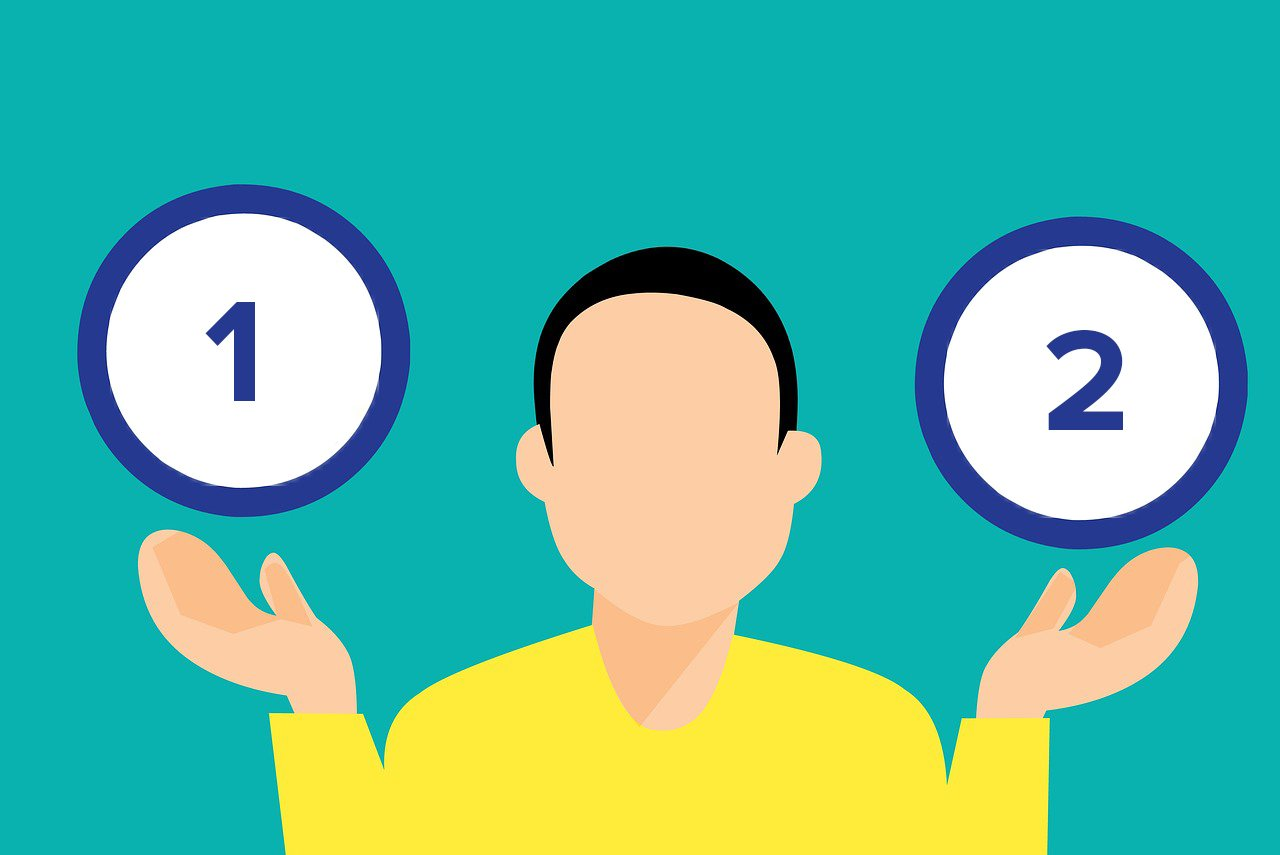

Now that we have the data for both.. let's see how the two leagues match up when htey go head to head.

Do MLS defenders have better defensive stats than EPL defenders?

In [ ]:
AMdefendersFrame[which.max(AMdefendersFrame$BallRecoveries),] > defendersFrame[which.max(defendersFrame$ballRecoveries),]

,Number,Name,ChallengesWon,Tackles,BallRecoveries,MinutesPlayed
20,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE


Do American midfielders perform better statistically than EPL defenders?

OR

The best defender in MLS vs the best defender in EPL

In [ ]:
AMmidfieldersFrame[which.max(AMmidfieldersFrame$Assists),] > midfieldersFrame[which.max(midfieldersFrame$Assists),]

,Number,Name,Assists,AccuratePasses,KeyPasses,Dribbles,MinutesPlayed
264,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE


#Below, you can see how the MLS and the EPL stack up against each other.
The boxplots show us that American defender's distrubution of number of tackles made is overall lower than the distribution of the number of tackles that EPL defenders made.


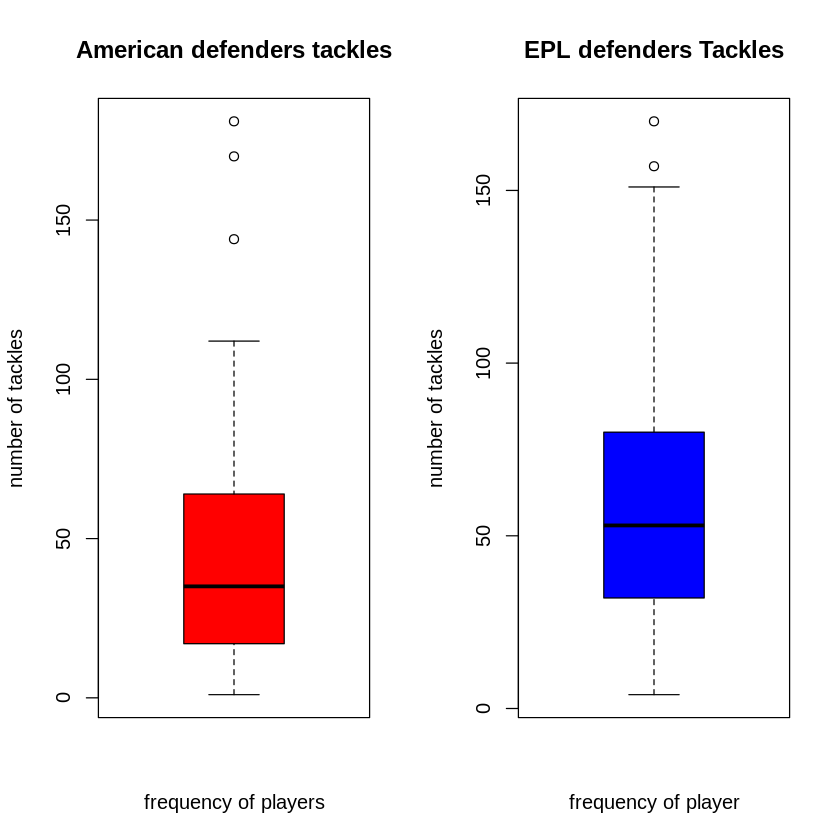

In [ ]:
par(mfrow=c(1,2))

boxplot(AMmidfielders$Dribbles, main="American defenders tackles", xlab= "frequency of players", ylab="number of tackles", col="red")
boxplot(midfielders$Dribbles, main="EPL defenders Tackles", xlab= "frequency of player", ylab="number of tackles", col="blue")

this shows that American shots on target is distributed less than EPL shots on target.

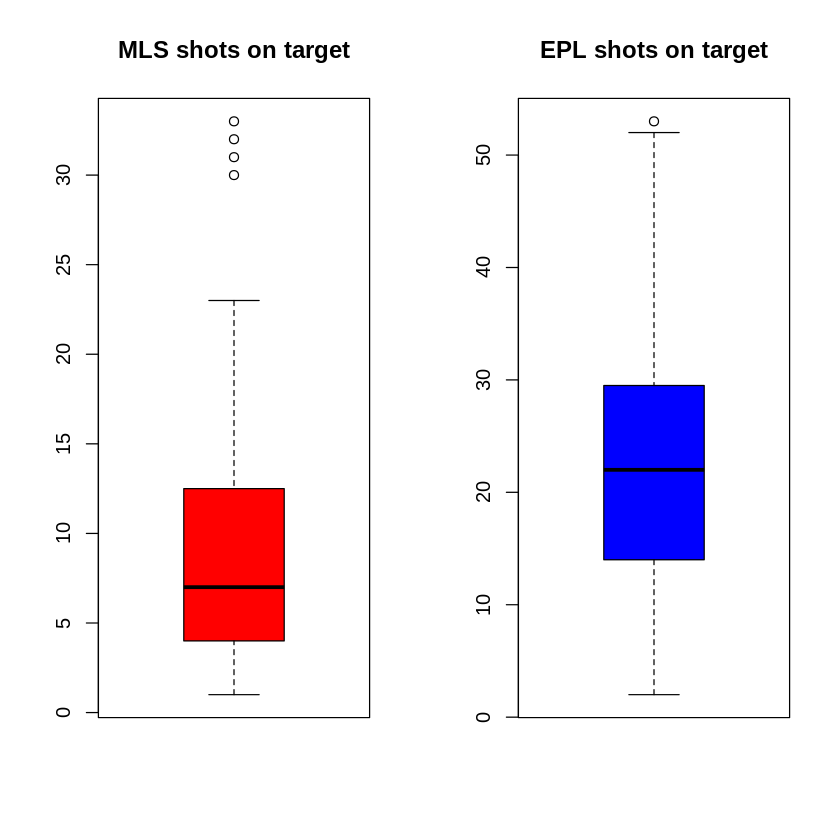

In [ ]:
par(mfrow=c(1,2))

boxplot(AMattackers$Shots.on.Target, main="MLS shots on target", col="red")
boxplot(attackers$Shots.On.Target, main="EPL shots on target", col="blue")

This is the first form of graph we tried. We wanted to see if we could go bigger and try something more complex to show our data in a better way.

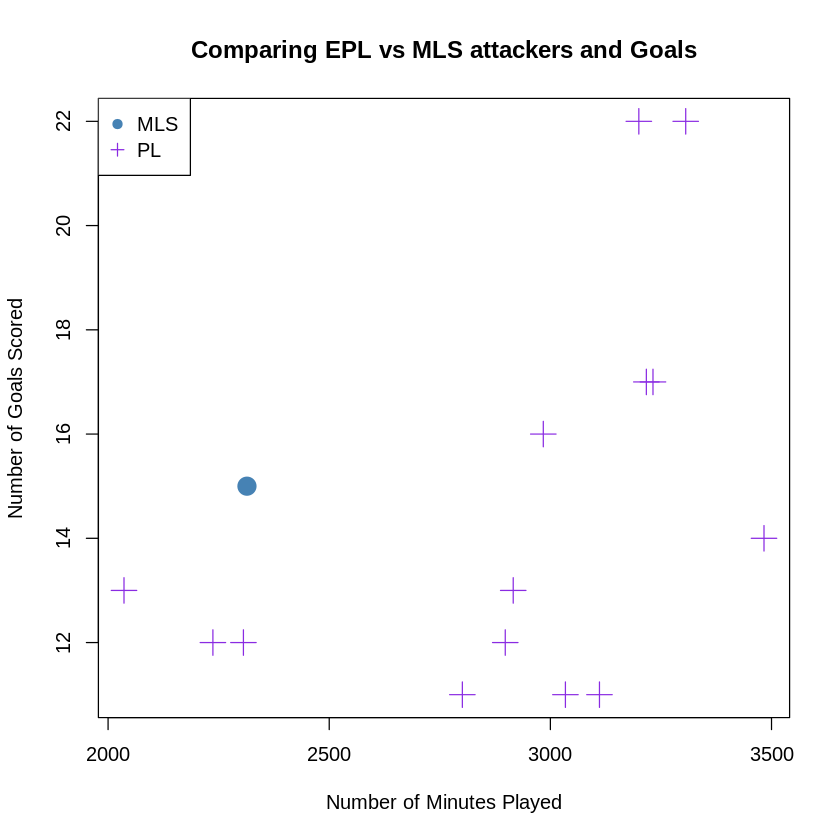

In [ ]:
g <- attackers[(attackers$Goals > 10), ]
g1 <- AMattackers[(AMattackers$Goals > 10), ]

plot(g$Goals~g$minutesPlayed, col="blueviolet", pch=3, xlab="Number of Minutes Played", cex=2, main="Comparing EPL vs MLS attackers and Goals", ylab="Number of Goals Scored")
points(g1$Goals~g1$Minutes.played, col="steelblue", pch=19, cex=2)

legend("topleft", legend=c("MLS", "PL"), pch=c(19,3),
       col=c("steelblue", "blueviolet"))

Slowly trying new things...

Warning message in geom_histogram(binwidth = 5, colour = "Black", position = "dodge", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


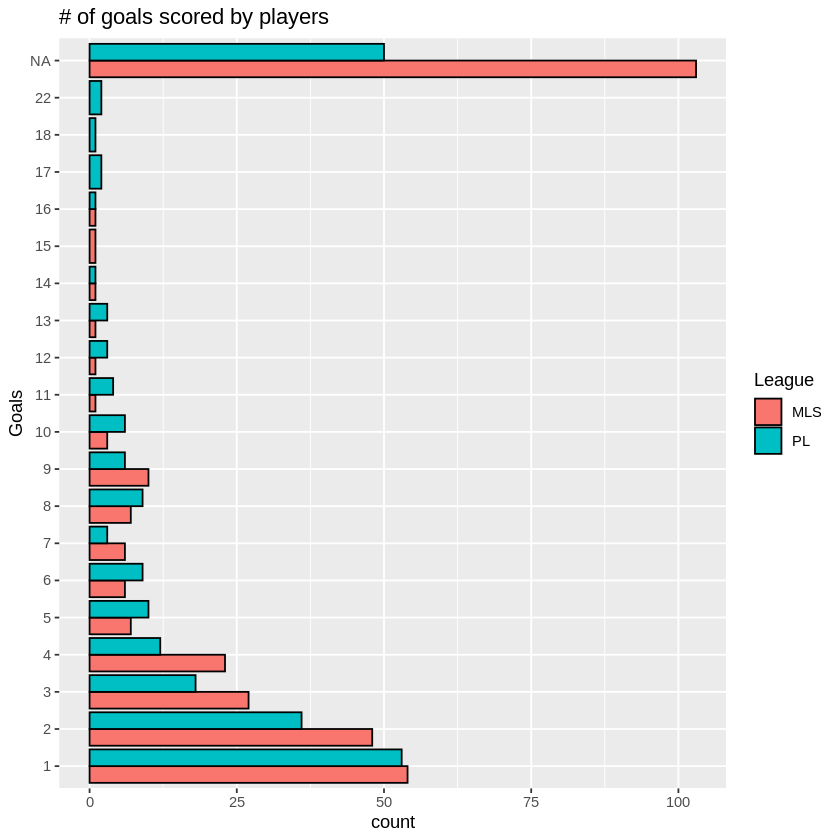

In [ ]:
df <- rbind(data.frame(League="PL", goals=players$Goals),
            data.frame(League="MLS", goals=AMplayers$Goals))

df$goals<- as.factor(df$goals)
df$League <- as.factor(df$League)

ggplot(df, aes(x=goals, fill=League)) +
geom_histogram( binwidth=5, colour="Black", position ="dodge", stat="count") +
ggtitle("# of goals scored by players") +
labs(x="Goals") +
coord_flip()

Warning message in geom_histogram(binwidth = 5, colour = "Black", position = "dodge", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


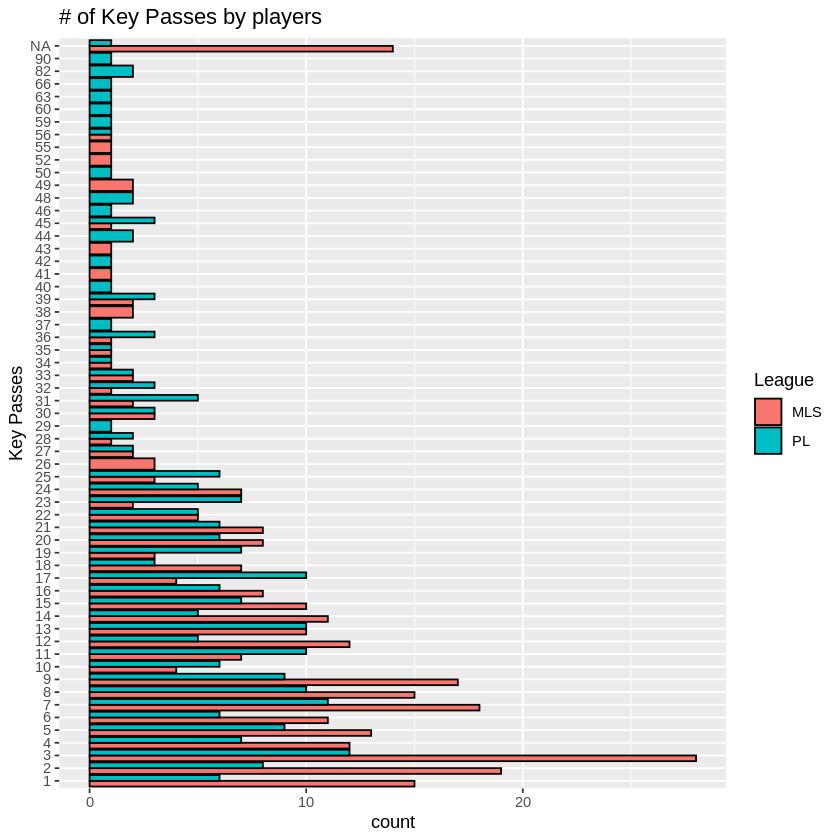

In [ ]:
DF <- rbind(data.frame(League="PL", KeyPasses=players$Key.passes),
            data.frame(League="MLS", KeyPasses=AMplayers$Key.passes))

DF$KeyPasses<- as.factor(DF$KeyPasses)
DF$KeyPasses<- as.factor(DF$KeyPasses)

ggplot(DF, aes(x=KeyPasses, fill=League)) +
geom_histogram( binwidth=5, colour="Black", position ="dodge", stat="count") +
ggtitle("# of Key Passes by players") +
labs(x="Key Passes") +
coord_flip()

Warning message in geom_histogram(colour = "Black", position = "dodge", stat = "count"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


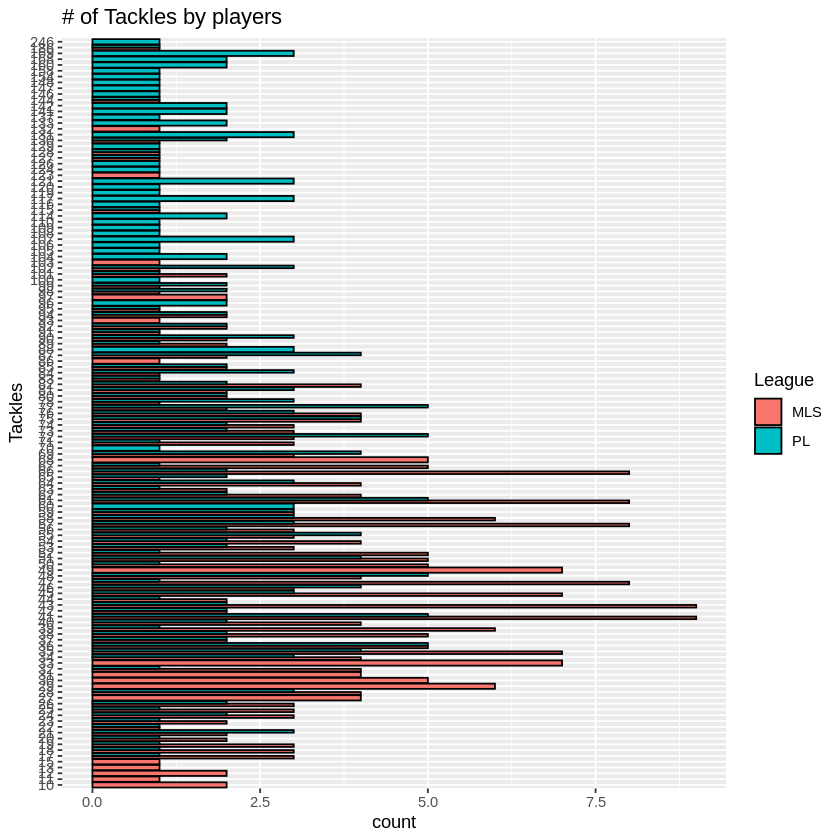

In [ ]:
DF1 <- rbind(data.frame(League="PL", Tackles=players$Tackles),
            data.frame(League="MLS", Tackles=AMplayers$Tackles))

DF1$Tackles<- as.factor(DF1$Tackles)
DF1$Tackles<- as.factor(DF1$Tackles)

ggplot(DF1, aes(x=Tackles, fill=League)) +
geom_histogram( colour="Black", position ="dodge", stat="count") +
ggtitle("# of Tackles by players") +
labs(x="Tackles") +
coord_flip()

# **Conclusion**

Based on the data and graphs we have plotted, it looks like the Premier League is overal better than the Major League Soccer, based on stats in the categories we looked at.

**Overall**, we both learned a lot from this project and enjoyed trying new things, despite the occasional frustrations.



Question to the product owner: Do you have any recommendations for us that would enable us to do things faster?

Citations:

InStat(2021) Soccer Statistic APP.  https://instatsport.com/

In [ ]:
citation()
citation("ggplot2")
citation("ggrepel")


To cite R in publications use:

  R Core Team (2022). R: A language and environment for statistical
  computing. R Foundation for Statistical Computing, Vienna, Austria.
  URL https://www.R-project.org/.

A BibTeX entry for LaTeX users is

  @Manual{,
    title = {R: A Language and Environment for Statistical Computing},
    author = {{R Core Team}},
    organization = {R Foundation for Statistical Computing},
    address = {Vienna, Austria},
    year = {2022},
    url = {https://www.R-project.org/},
  }

We have invested a lot of time and effort in creating R, please cite it
when using it for data analysis. See also ‘citation("pkgname")’ for
citing R packages.



To cite ggplot2 in publications, please use:

  H. Wickham. ggplot2: Elegant Graphics for Data Analysis.
  Springer-Verlag New York, 2016.

A BibTeX entry for LaTeX users is

  @Book{,
    author = {Hadley Wickham},
    title = {ggplot2: Elegant Graphics for Data Analysis},
    publisher = {Springer-Verlag New York},
    year = {2016},
    isbn = {978-3-319-24277-4},
    url = {https://ggplot2.tidyverse.org},
  }



To cite package ‘ggrepel’ in publications use:

  Slowikowski K (2022). _ggrepel: Automatically Position
  Non-Overlapping Text Labels with 'ggplot2'_. R package version 0.9.2,
  <https://CRAN.R-project.org/package=ggrepel>.

A BibTeX entry for LaTeX users is

  @Manual{,
    title = {ggrepel: Automatically Position Non-Overlapping Text Labels with
'ggplot2'},
    author = {Kamil Slowikowski},
    year = {2022},
    note = {R package version 0.9.2},
    url = {https://CRAN.R-project.org/package=ggrepel},
  }




# **Thank you!**